<a href="https://colab.research.google.com/github/Janardhan-yadav/AIML_Projects_and_labs/blob/main/AIML_Module_01_Lab_01_Features(jy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [2]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=125ac3add27d6b0822d5624ea48cb8498277019bc67e54556c596ecb5a3abbc1
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [3]:
topic1 = 'Science'
topic2 = 'Art'

wikipedia.set_lang('en')

# Specify the exact page title to avoid ambiguity
# You might need to choose the appropriate title from the list of suggestions
# provided in the error message. For example, you could try:
# eng1 = wikipedia.page("Science (disambiguation)")
# or eng1 = wikipedia.page("Science and technology")
# depending on the specific page you are interested in.
try:
    eng1 = wikipedia.page(topic1) # Try to fetch the page without disambiguation
except wikipedia.exceptions.DisambiguationError as e:
    print(f"DisambiguationError: {e.options}") # Print the list of possible pages
    # Select the desired page title from the list
    # For example, let's assume the first option is the correct one
    selected_page_title = e.options[0]
    eng1 = wikipedia.page(selected_page_title) # Fetch the specific page

eng2 = wikipedia.page(topic2)

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1)
fr2 = wikipedia.page(topic2)

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


DisambiguationError: ['Sincé', 'Sińce', 'Since (film)', 'Since (album)', 'Since (rapper)']


This is what the text looks like:

In [4]:
fr2

<WikipediaPage 'Art'>

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [5]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [12]:
eng1 = cleanup(eng1.title)
eng2 = cleanup(eng2.title)
fr1 = cleanup(fr1.title)
fr2 = cleanup(fr2.summary)

In [13]:
print(eng1)

sinc


Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [14]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

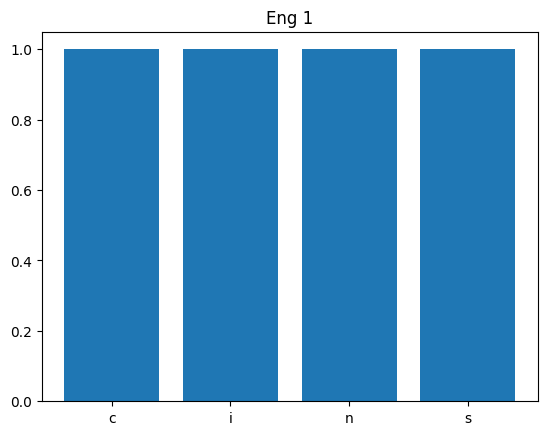

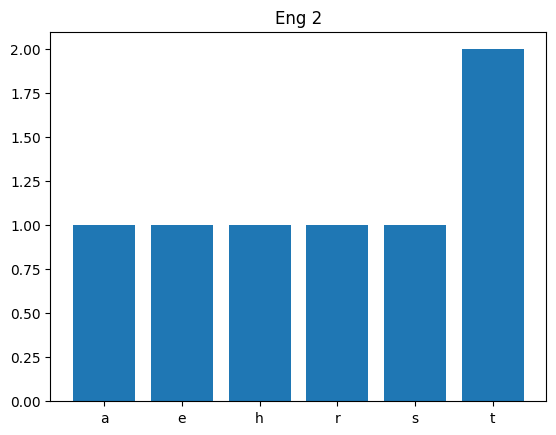

In [15]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('Eng 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('Eng 2')
plt.show()

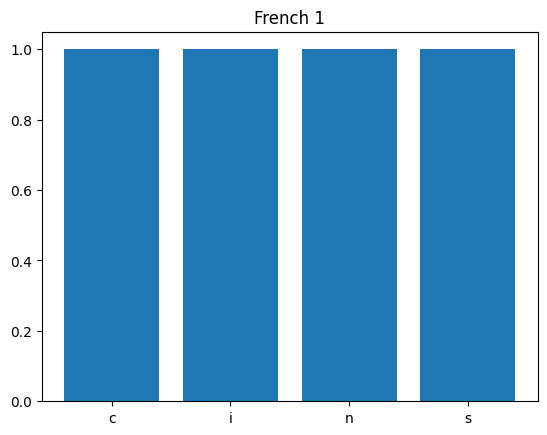

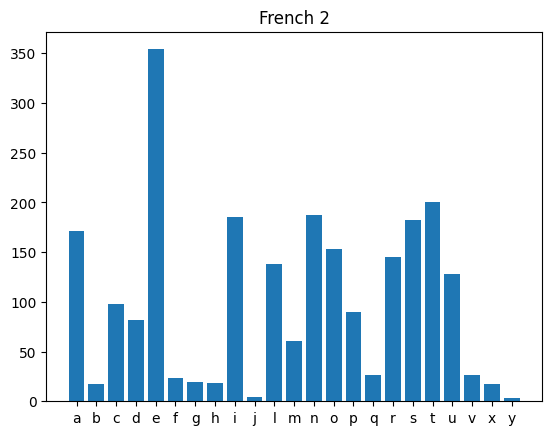

In [16]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

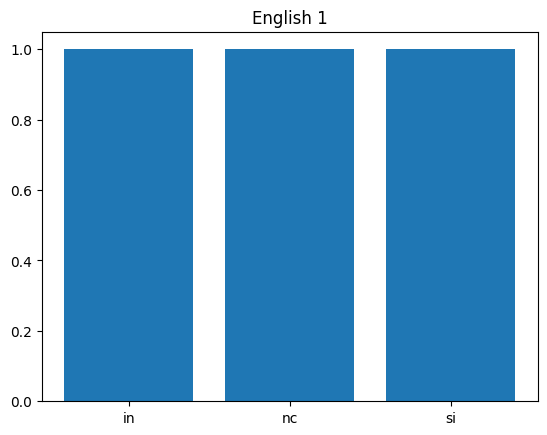

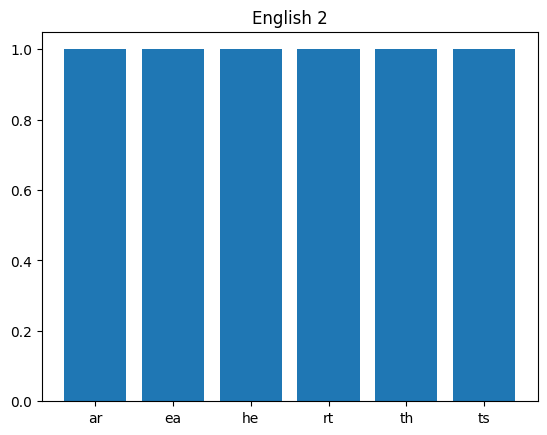

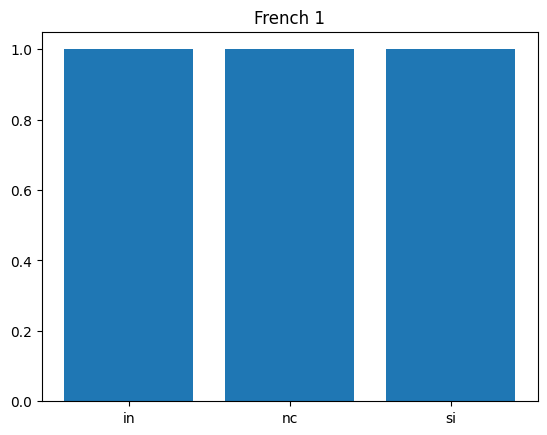

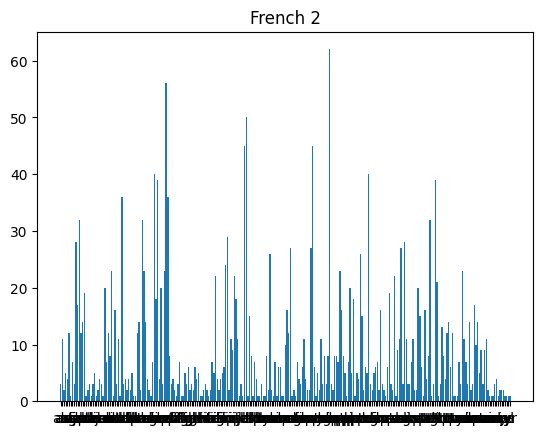

In [17]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [18]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

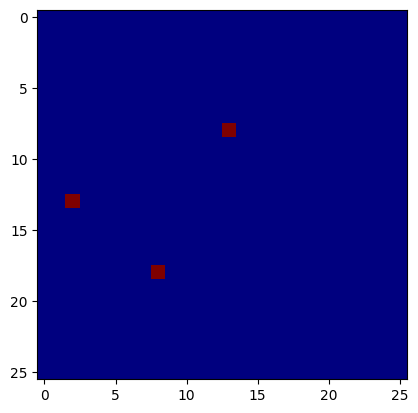

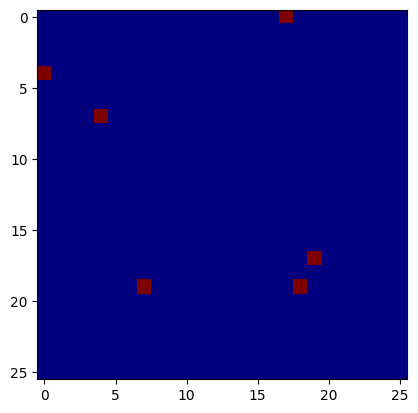

In [19]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

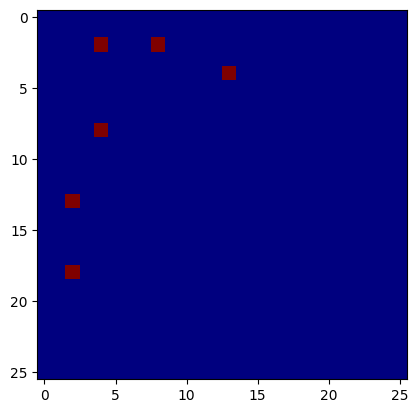

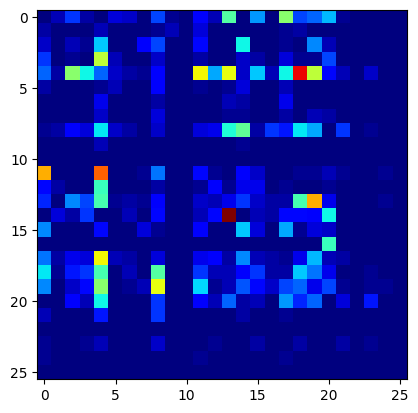

In [20]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [21]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [22]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('n', 'c') : 1.0
('s', 'i') : 1.0
('i', 'n') : 1.0
('a', 'a') : 0.0
('r', 'e') : 0.0
('r', 'f') : 0.0
('r', 'g') : 0.0
('r', 'h') : 0.0
('r', 'i') : 0.0
('r', 'j') : 0.0

English 2:
('r', 't') : 1.0
('t', 'h') : 1.0
('t', 's') : 1.0
('a', 'r') : 1.0
('h', 'e') : 1.0
('e', 'a') : 1.0
('a', 'a') : 0.0
('r', 'd') : 0.0
('r', 'e') : 0.0
('r', 'f') : 0.0

French 1:
('n', 'c') : 1.0
('i', 'e') : 1.0
('c', 'i') : 1.0
('s', 'c') : 1.0
('c', 'e') : 1.0
('e', 'n') : 1.0
('r', 'h') : 0.0
('r', 'i') : 0.0
('r', 'j') : 0.0
('r', 'k') : 0.0

French 2:
('o', 'n') : 62.0
('e', 's') : 56.0
('l', 'e') : 50.0
('n', 't') : 45.0
('l', 'a') : 45.0
('e', 'l') : 40.0
('r', 'e') : 40.0
('t', 'i') : 39.0
('e', 'n') : 39.0
('d', 'e') : 36.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [25]:
!pip install nltk
!pip install matplotlib
!pip install wordcloud

import nltk
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download necessary NLTK resources if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

# Assuming you have text data in a variable called 'text'
# For example: text = fr2.summary (from your previous example)

def generate_ngrams(text, n):
    """Generates n-grams from a given text.

    Args:
        text: The input text.
        n: The length of the n-grams to generate.

    Returns:
        A list of n-grams.
    """

    # Tokenize the text into words
    # The issue was here, need to apply .split() for strings, or directly access text in fr2
    tokens = nltk.word_tokenize(text.split() if isinstance(text, str) else text.content)

    # Generate n-grams
    n_grams = list(ngrams(tokens, n))

    return n_grams

def visualize_ngrams(n_grams, top_k=20):
    """Visualizes the most frequent n-grams using a bar chart and a word cloud.

    Args:
        n_grams: A list of n-grams.
        top_k: The number of most frequent n-grams to display.
    """

    # Count the frequency of each n-gram
    n_gram_freq = Counter(n_grams)

    # Get the top k most frequent n-grams
    top_n_grams = n_gram_freq.most_common(top_k)

    # Check if top_n_grams is empty
    if not top_n_grams:
        print("No n-grams found to visualize.")
        return

    # Prepare data for bar chart
    n_grams, frequencies = map(list, zip(*top_n_grams))
    n_grams = [" ".join(gram) for gram in n_grams]  # Join words in n-grams

    # Create bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(n_grams, frequencies)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(f"Top {top_k} Most Frequent N-grams")
    plt.tight_layout()
    plt.show()

    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_gram_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("N-gram Word Cloud")
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def generate_ngrams(text, n):
    """Generates n-grams from a given text.

    Args:
        text: The input text.
        n: The length of the n-grams to generate.

    Returns:
        A list of n-grams.
    """

    # Tokenize the text into words
    # Check if text is a string and if not, try accessing its content attribute
    if isinstance(text, str):
        tokens = nltk.word_tokenize(text) # Directly tokenize if it's a string
    else:
        try:
            tokens = nltk.word_tokenize(text.content)
        except AttributeError:
            raise TypeError("Input text must be a string or have a 'content' attribute.")

    # Generate n-grams
    n_grams = list(ngrams(tokens, n))

    return n_grams

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [30]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [31]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

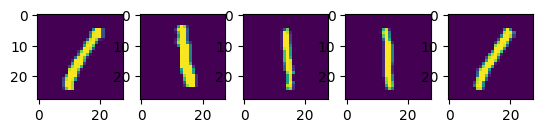

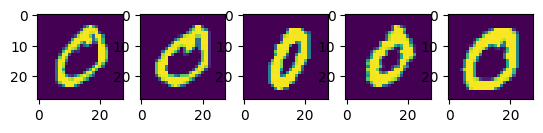

In [32]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [33]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

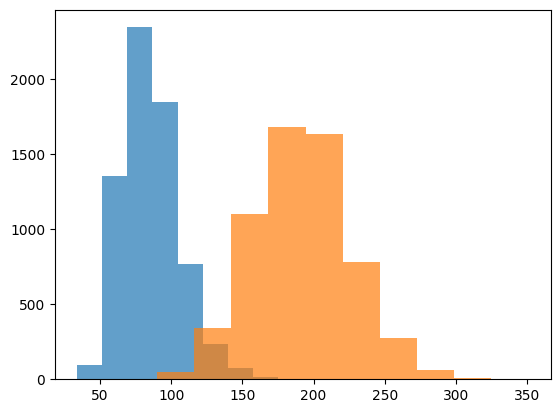

In [34]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [35]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

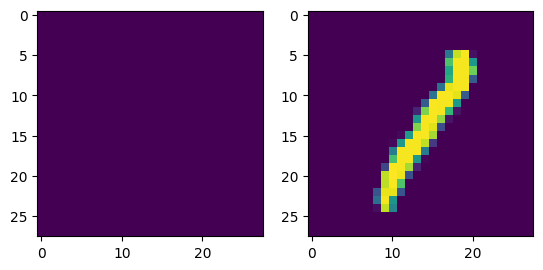

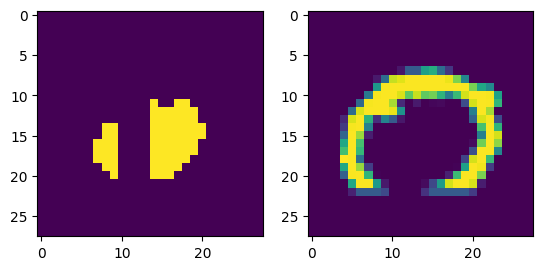

In [36]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

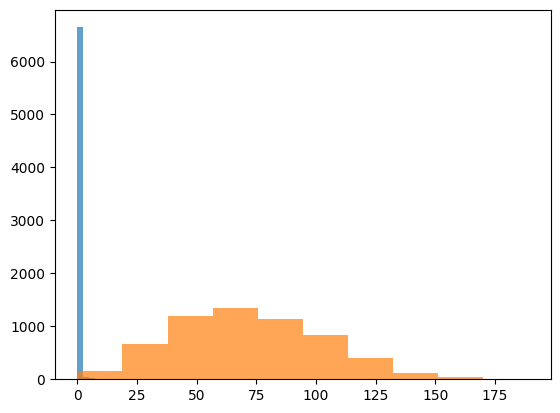

In [37]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [38]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

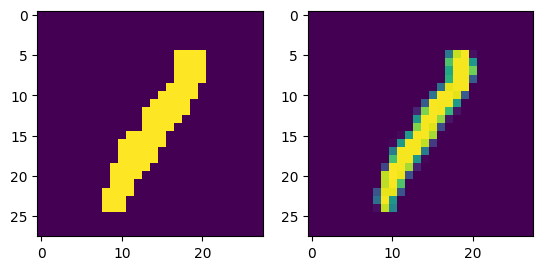

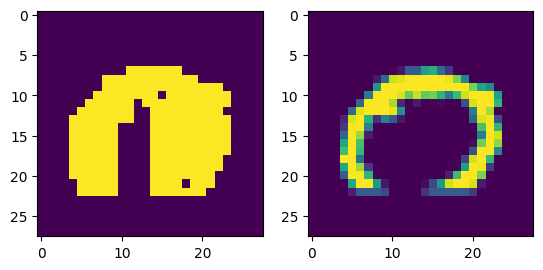

In [39]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

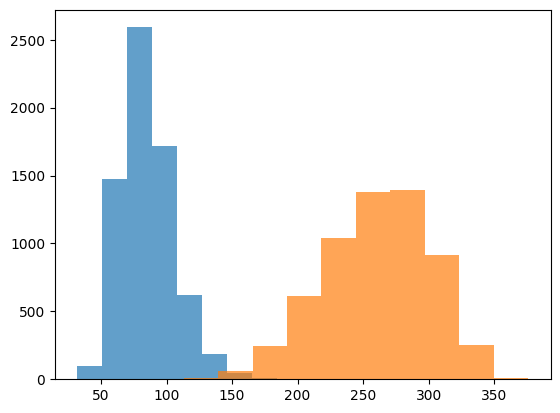

In [40]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [41]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

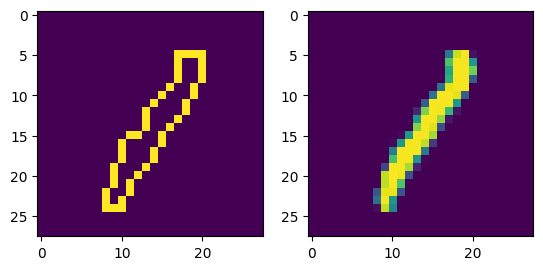

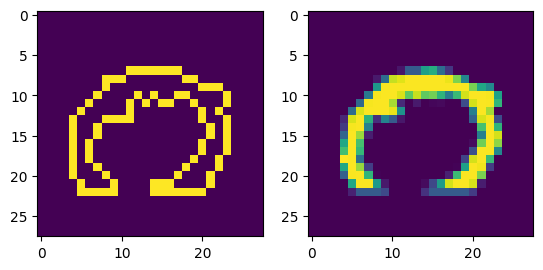

In [42]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

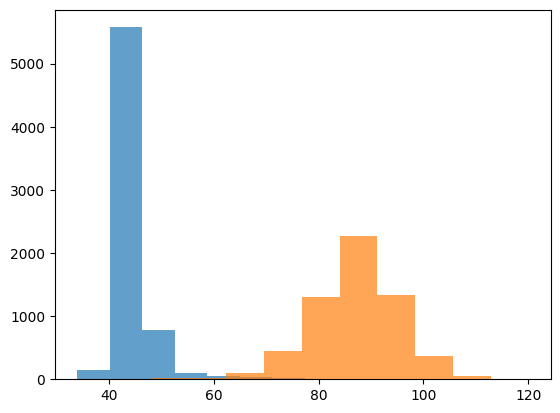

In [43]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

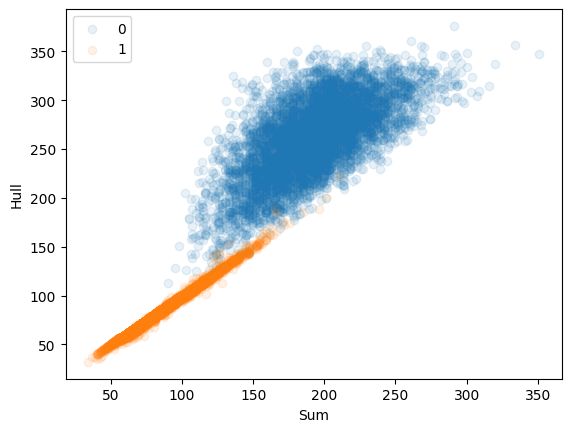

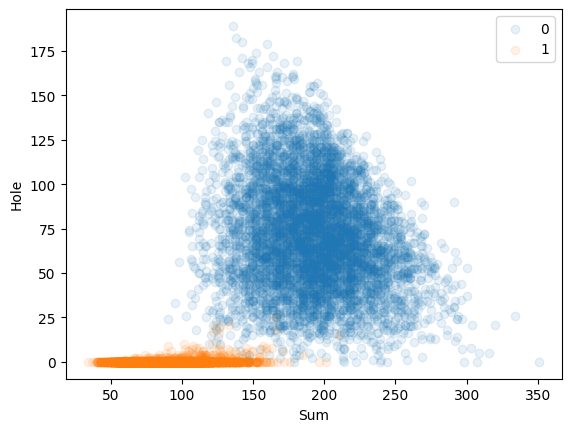

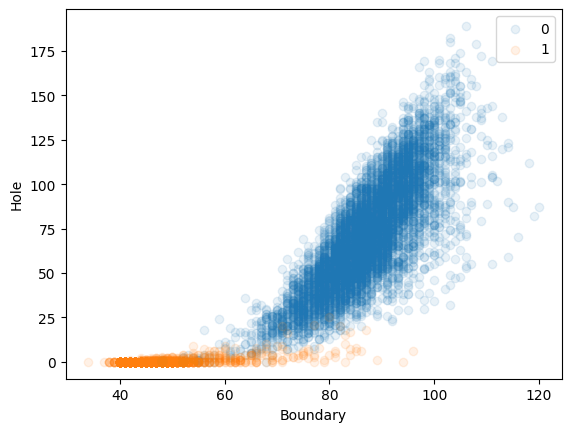

In [44]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [45]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1) Determining the best combination of features is a crucial step in machine learning and often depends on the specific dataset and the algorithm being used. Here's how you can approach it:

Feature Importance from Models: Many machine learning models provide feature importance scores (e.g., Random Forest, Gradient Boosting). These scores can guide you towards the most influential features.

Feature Selection Techniques: Utilize feature selection methods like:

Filter methods: These methods use statistical measures (e.g., correlation, chi-squared) to rank and select features.
Wrapper methods: These methods use a specific machine learning algorithm and evaluate feature subsets based on model performance (e.g., Recursive Feature Elimination).
Embedded methods: These methods incorporate feature selection as part of the model training process (e.g., LASSO regression).
Experimentation and Validation: Try different feature combinations and evaluate their performance using cross-validation or a hold-out dataset. This helps you find the combination that leads to the best results on unseen data.

In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame from the previous cell
# and 'Hole', 'Sum', 'Boundary' are your features
X_features = df[['Hole', 'Sum', 'Boundary']].values  # Create X_features from your DataFrame
y_binary = (df['Class'] == 'class 1').astype(int).values  # Create y_binary, assuming 'class 1' is the positive class

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_binary, test_size=0.3, random_state=42)

# Train a Logistic Regression model on different feature sets
feature_combinations = [
    [0],           # Only Feature 1 (Total Pixel Sum)
    [1],           # Only Feature 2 (Left Half Sum)
    [0, 1],        # Features 1 and 2
    [0, 1, 2]   # All 3 features (Hole, Sum, Boundary)
]

for comb in feature_combinations:
    model = LogisticRegression()
    model.fit(X_train[:, comb], y_train)
    y_pred = model.predict(X_test[:, comb])
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Features {comb}: Accuracy = {accuracy:.2f}")

Features [0]: Accuracy = 0.58
Features [1]: Accuracy = 0.97
Features [0, 1]: Accuracy = 0.97
Features [0, 1, 2]: Accuracy = 0.99


2) Visualizing and testing relationships between four or more features can be challenging, but here are some strategies:

Pair Plots (Scatter Matrix): Create a scatter matrix plot to visualize pairwise relationships between all features. This can reveal correlations and potential patterns.

3D Scatter Plots with Color: If you have four features, you can use a 3D scatter plot and encode the fourth feature using color or size of the points.

Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) or t-SNE can reduce the dimensionality of your data, allowing you to visualize it in 2D or 3D while preserving important relationships.

Parallel Coordinates: This technique is useful for visualizing high-dimensional data. Each feature is represented by a vertical axis, and data points are connected by lines across the axes.

Heatmaps: Create a heatmap to show the correlation between features. This can help you identify groups of highly correlated features.

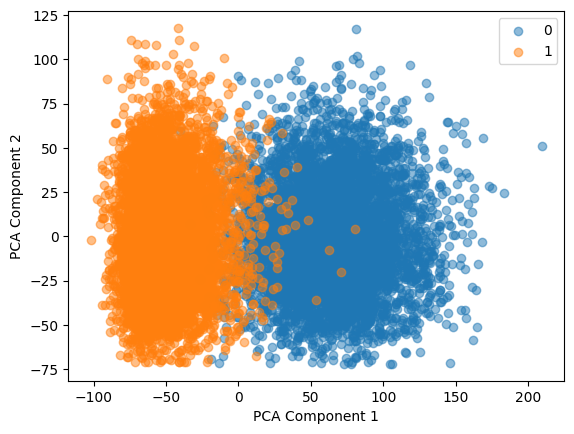

In [48]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the feature space to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# Visualize the 2D PCA result
plt.scatter(X_pca[y_binary == 0, 0], X_pca[y_binary == 0, 1], label='0', alpha=0.5)
plt.scatter(X_pca[y_binary == 1, 0], X_pca[y_binary == 1, 1], label='1', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()



3) Yes, feature engineering is a crucial part of machine learning where you create new features from existing ones to improve model performance. Here are some examples of custom features you might create:

Combining features: Create new features by combining existing ones (e.g., adding, subtracting, multiplying, or taking ratios).
Aggregations: Calculate statistics like mean, median, standard deviation, or range for a set of features.
Time-based features: Extract features related to time, such as day of the week, month, or time elapsed since a specific event.
Domain-specific features: Create features based on your understanding of the problem domain.
*   List item
*   List item



In [53]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np # import numpy

X_binary = df['Hole'].values


def custom_features(images):
    if images.ndim == 1:
        images = images.reshape(-1, 1)

    f1 = np.sum(images, axis=1)  # Total Pixel Sum
    f2 = np.mean(images, axis=1)  # Average Pixel Intensity
    f3 = np.sum(images[:, :392], axis=1) - np.sum(images[:, 392:], axis=1)  # Difference between Left & Right Sum
    return np.column_stack([f1, f2, f3])

# Apply the new feature extraction
X_custom_features = custom_features(X_binary)

print(X_custom_features[:5])  # Display the first 5 examples

[[72. 72. 72.]
 [65. 65. 65.]
 [23. 23. 23.]
 [24. 24. 24.]
 [74. 74. 74.]]
